In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import re   # Regular expressions
from sklearn.cluster import KMeans
import math

In [ ]:

class imagePreparation:
    
    def __init__(self, image) -> None:
       self.image = image

       
    def setTransformation(self): 
    
        self.height, self.width = self.image.shape[:2]
        self.mask = np.zeros((self.height,self.width), np.uint8)

# Transform to gray colorspace and invert Otsu threshold the image
        gray = cv2.cvtColor( self.image,cv2.COLOR_BGR2GRAY)
       # _, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

### Perform opening (erosion followed by dilation)
        kernel = np.ones((2,2),np.uint8)
        # opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
        
        
        imgCanny = cv2.Canny(gray,100,100)
        kernel = np.ones((5,5),np.uint8)
        self.imgEroded = cv2.dilate(imgCanny,kernel,iterations=1)

        
    def setContours(self):    
        contours1, hierarchy1 = cv2.findContours(self.imgEroded, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

        self.IdentifiedContours = sorted(contours1, key=cv2.contourArea, reverse=True)
        for contour in self.IdentifiedContours:
            area = cv2.contourArea(contour)
            print("Contour area:", area)

In [4]:
def cropImage(ivSource, ivDestination, ivType):    # Type refers to image with one or two boxes to split


    img = cv2.imread(ivSource)

    h,w = img.shape[:2]
    mask = np.zeros((h,w), np.uint8)

    # Transform to gray colorspace and invert Otsu threshold the image
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #_, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


    ### Perform morphologyEx (erosion followed by dilation)
    #kernel = np.ones((2,2),np.uint8)
   # opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)   
    imgCanny = cv2.Canny(gray,100,100)
#    plt.imshow(imgCanny)


    # play with kernel settings to see impact on output files
    kernel = np.ones((5,5),np.uint8)
    #imgEroded = cv2.dilate(gray,kernel,iterations=1)
    imgEroded = cv2.dilate(imgCanny,kernel,iterations=1)
    #plt.imshow(imgEroded)# Search for contours, select the biggest and draw it on the mask
    #_, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)


  #  contours, hierarchy = cv2.findContours(opening, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    #contours1, hierarchy1 = cv2.findContours(imgEroded, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    contours1, _ = cv2.findContours(imgEroded, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
   
    tempContour = sorted(contours1, key=cv2.contourArea, reverse=True)

        
 #   temp1 = np.zeros((h,w), np.uint8)
    
    if ivType == 1:
        x,y,w,h = cv2.boundingRect(tempContour[1])
        final_image = img[y:y+h, x:x+w]
        cv2.imwrite(ivDestination, final_image )
    elif ivType == 2:
        
        for index, _ in enumerate(range(2)):
          x,y,w,h = cv2.boundingRect(tempContour[index +1])
          final_image = img[y:y+h, x:x+w]
          temp_destination = ivDestination[:-4] + "_" + str(index +1)  + ivDestination[-4:]
          cv2.imwrite(temp_destination, final_image )
          
    
 
            
 
    

In [6]:

## Wool images not being processed correctly - look into processing of those and how to split those images

current_directory = os.getcwd()
print('Current Directory', current_directory)

rawImages = os.path.join(current_directory, 'Data', 'synth', 'images', '')
rawMasks = os.path.join(current_directory, 'Data', 'synth', 'masks', '')




one_box_files = ["wash"]

directory = '..\Data\Raw'
target_directory = '..\Data\Prepared'

# Get all filenames in the directory
imageFilenames = os.listdir(rawImages)

pattern = r"\b(" + "|".join(one_box_files) + r")\b"

# Print the filenames
for filename in imageFilenames:
    ImageFile = os.path.join(rawImages, filename)
    maskFilename = ImageFile.replace('image', 'mask')
    
    MaskFile = os.path.join(rawMasks, maskFilename)
    
    target_file = os.path.join(target_directory, filename)





    # Check if the string contains any word from the array using regular expressions
    if re.search(pattern, rel_file, flags=re.IGNORECASE):
        print("The string contains a word from the array.")
        cropImage(rel_file, target_file,  1)
    else:
        cropImage(rel_file, target_file,  2)


The string contains a word from the array.


In [2]:
## Wool images not being processed correctly - look into processing of those and how to split those images

one_box_files = ["wash"]

directory = '..\Data\Raw'
target_directory = '..\Data\Prepared'

# Get all filenames in the directory
filenames = os.listdir(directory)
filenames1 = os.listdir(target_directory)

pattern = r"\b(" + "|".join(one_box_files) + r")\b"

# Print the filenames
for filename in filenames:
    rel_file = os.path.join(directory, filename)
    target_file = os.path.join(target_directory, filename)

    # read image
    img = cv2.imread(rel_file, cv2.IMREAD_UNCHANGED)

# get dimensions of image
    print(img.shape)
    

# Print the filenames
for filename in filenames1:
    rel_file = os.path.join(directory, filename)
    target_file = os.path.join(target_directory, filename)

    # read image
    img = cv2.imread(target_file, cv2.IMREAD_UNCHANGED)

# get dimensions of image
    print(target_file, img.shape)
    
    
    

(66, 20, 3)
(1944, 2592, 3)
..\Data\Prepared\1 manual sand count_1.tif (884, 1733, 3)
..\Data\Prepared\1 manual sand count_2.tif (888, 1732, 3)
..\Data\Prepared\1 manual wash count.tif (1721, 1724, 3)
..\Data\Prepared\one.tif (1721, 1724, 3)


[[[132 134 182]
  [136 142 185]
  [136 150 186]
  ...
  [100  95 157]
  [ 87  82 143]
  [ 97  92 153]]

 [[109 111 159]
  [120 125 170]
  [134 143 180]
  ...
  [114 114 168]
  [111 111 165]
  [121 122 173]]

 [[ 96  95 145]
  [114 114 160]
  [138 138 178]
  ...
  [134 143 181]
  [135 144 181]
  [142 151 188]]

 ...

 [[179 176 198]
  [168 165 191]
  [150 146 182]
  ...
  [162 172 190]
  [163 171 188]
  [159 166 181]]

 [[175 170 191]
  [169 167 189]
  [159 160 188]
  ...
  [172 174 192]
  [175 175 191]
  [172 172 188]]

 [[173 169 188]
  [170 169 189]
  [165 166 192]
  ...
  [176 176 192]
  [180 177 193]
  [177 174 190]]]
Minimum gradient magnitude: 0.0
Maximum gradient magnitude: 270.1481075262235
[[[170 163 166]
  [170 163 166]
  [170 163 166]
  ...
  [147 140 153]
  [143 136 149]
  [141 134 147]]

 [[171 164 167]
  [170 163 166]
  [170 163 166]
  ...
  [152 145 158]
  [151 142 155]
  [147 140 153]]

 [[172 165 168]
  [171 164 167]
  [170 163 166]
  ...
  [156 148 159]
  [155 145 157

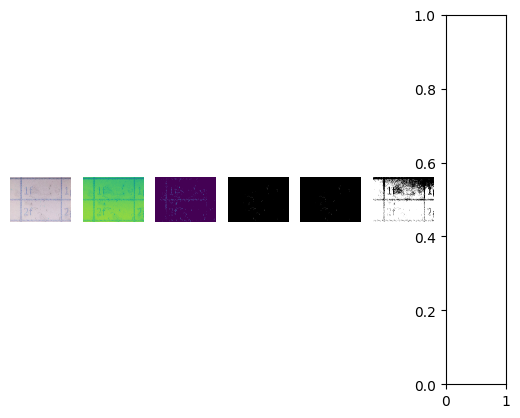

In [3]:
target_directory = '..\Data\Prepared'
target_directory = '..\Data\Raw'
filenames1 = os.listdir(target_directory)
#cv2.imshow('one', img)


fig, axes = plt.subplots(nrows=1, ncols=7)

# Print the filenames
for filename in filenames1:
    target_file = os.path.join(target_directory, filename)
# read image
    img = cv2.imread(target_file, cv2.IMREAD_UNCHANGED)

    print(img)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    imgCanny = cv2.Canny(gray,100,200)
    imgCanny1 = cv2.Canny(gray,400,500)
    imgCanny2 = cv2.Canny(gray,500,600)

# Compute the gradient in the x and y directions using Sobel operator
    gradient_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    # Compute the gradient magnitude
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    # Calculate the minimum and maximum gradient magnitudes
    min_gradient_magnitude = np.min(gradient_magnitude)
    max_gradient_magnitude = np.max(gradient_magnitude)

    print(f"Minimum gradient magnitude: {min_gradient_magnitude}")
    print(f"Maximum gradient magnitude: {max_gradient_magnitude}")

# Apply thresholding to convert to black and white
    _, black_white = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)


    axes[0].imshow(img)
    axes[0].axis('off')
    axes[1].imshow(gray)
    axes[1].axis('off')
    axes[2].imshow(imgCanny)
    axes[2].axis('off')
    axes[3].imshow(imgCanny1, cmap='gray')
    axes[3].axis('off')
    axes[4].imshow(imgCanny2, cmap='gray')
    axes[4].axis('off')                 
    axes[5].imshow(black_white, cmap='gray')
    axes[5].axis('off')                 

# Define the threshold for closeness to white
threshold = 130  # Adjust as needed

# Define the white color value
white_color = [255, 255, 255]

# # Iterate over each pixel and set close-to-white pixels to white
# for row in range(img.shape[0]):
#     for col in range(img.shape[1]):
#         pixel = img[row, col]
#         if np.all(pixel >= 255 - threshold):  # Check if color is close to white
#             img[row, col] = white_color

# axes[6].imshow(img)
# axes[6].axis('off')
# Display the modified image
# cv2.imshow('Modified Image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# # Convert the image to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # Apply a threshold to obtain a binary image
# _, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# # Find contours in the binary image
# contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Sort the contours based on their areas (largest to smallest)
# contours = sorted(contours, key=cv2.contourArea, reverse=True)

# # Display up to 5 largest contours
# num_contours = min(5, len(contours))
# for i in range(num_contours):
#     # Draw the contour on the image
#     cv2.drawContours(img, [contours[i]], -1, (0, 255, 0), 2)

# # Display the image with contours
# cv2.imshow('Image with Contours', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
    
# Reshape the image to a 2D array of pixels
# pixels = img.reshape(-1, 3)  # Reshape to (height*width, 3)
# #print(pixels)

# # # # Perform k-means clustering
# num_colors = 5  # Number of colors to capture
# kmeans = KMeans(n_clusters=num_colors)
# kmeans.fit(pixels)

# # Get the labels assigned to each pixel
# labels = kmeans.labels_

# # Choose a cluster to set as black
# cluster_to_black = 3

# # Assign black color to the pixels in the chosen cluster
# black_pixels = labels == cluster_to_black
# pixels[black_pixels] = [0, 0, 0]

# # Reshape the pixels back to the original image shape
# modified_image = pixels.reshape(img.shape)

# # Display the modified image
# cv2.imshow('Modified Image', modified_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# # Convert the colors to a NumPy array
# colors_to_replace = np.array(colors_to_replace)

# # Iterate over each pixel and replace the specified colors with black
# for row in range(img.shape[0]):
#     for col in range(img.shape[1]):
#         pixel = img[row, col]
#         if np.any((pixel == colors_to_replace).all(axis=1)):
#             img[row, col] = [0, 0, 0]  # Set the pixel color to black

# # Display the modified image
# cv2.imshow('Modified Image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# # Find the most common color
#most_common_color = colors[np.argmax(np.unique(kmeans.labels_, return_counts=True)[1])]

# # Convert the most common color to black
# black_pixels = (pixels == most_common_color).all(axis=1)
# pixels[black_pixels] = [0, 0, 0]

# # Reshape the pixels back to the original image shape
# modified_image = pixels.reshape(img.shape)

# # Display the modified image
# cv2.imshow('Modified Image', modified_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# # Adjust the spacing between subplots
# plt.tight_layout()

# # Show the figure
# plt.show()




In [53]:
# Choose a cluster to set as black
cluster_to_black = 5

# Assign black color to the pixels in the chosen cluster
black_pixels = labels == cluster_to_black
pixels[black_pixels] = [0, 0, 0]

# Reshape the pixels back to the original image shape
modified_image = pixels.reshape(img.shape)

# Display the modified image
cv2.imshow('Modified Image', modified_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [66]:
# Read the pattern image and the target image
pattern_image = cv2.imread('..\Data\Raw\screenshot.jpg')
target_image = cv2.imread('..\Data\Raw\wool.jpg')

# Convert both images to grayscale
pattern_gray = cv2.cvtColor(pattern_image, cv2.COLOR_BGR2GRAY)
target_gray = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY)

# Perform template matching
result = cv2.matchTemplate(target_gray, pattern_gray, cv2.TM_CCOEFF_NORMED)

# Define a threshold for the template matching result
threshold = 0.2 # Adjust as needed

# Find locations where the pattern matches in the target image
locations = np.where(result >= threshold)

# Iterate over the locations and replace the pattern with black in the target image
for pt in zip(*locations[::-1]):
    target_image[pt[1]:pt[1]+pattern_image.shape[0], pt[0]:pt[0]+pattern_image.shape[1]] = [0, 0, 0]  # Set to black

# Display the modified image
cv2.imshow('Modified Image', target_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [74]:
# Preprocess the image (e.g., convert to grayscale and apply edge detection)
pattern_image = cv2.imread('..\Data\Raw\screenshot.jpg')
# Apply Hough Line Transform
gray = cv2.cvtColor(pattern_image, cv2.COLOR_BGR2GRAY)


threshold1 = 127
threshold2 = 255

threshold3 = 10
rho = 3
theta = math.pi / 360
edges = cv2.Canny(gray, threshold1, threshold2)
lines = cv2.HoughLines(edges, rho, theta, threshold3)

# Draw the detected lines on a new image
for line in lines:
    rho, theta = line[0]
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    x0 = cos_theta * rho
    y0 = sin_theta * rho
    x1 = int(x0 + 1000 * (-sin_theta))
    y1 = int(y0 + 1000 * (cos_theta))
    x2 = int(x0 - 1000 * (-sin_theta))
    y2 = int(y0 - 1000 * (cos_theta))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display or save the result
cv2.imshow('Grid Lines Detected', img)
cv2.waitKey(0)
cv2.destroyAllWindows()